Import Packages


In [1]:
# General
import pandas as pd
import numpy as np
# Charts
import seaborn as sns
import matplotlib.pyplot as plt
# Model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import joblib as jb


Import Dataset


In [2]:
car_dataset = pd.read_csv('car_data.csv')


Data Reading
<br>
Data Classication
<br>
Data Correlation


In [3]:
car_dataset.shape


(301, 9)

In [4]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car_dataset.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

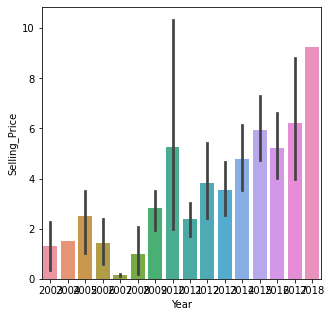

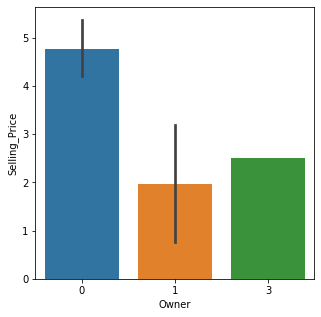

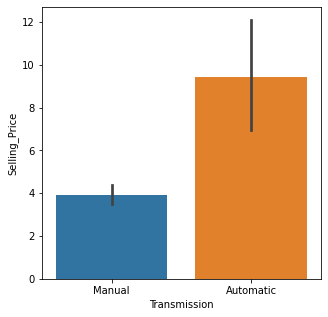

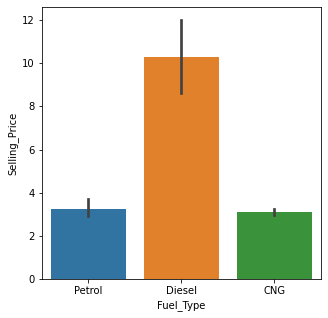

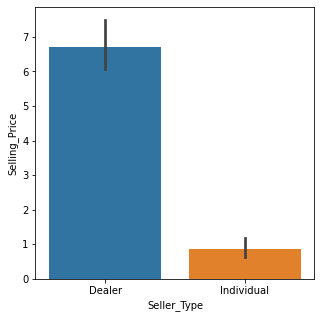

In [27]:
""" 1v1 correlations """
# Selling_Price vs Year
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='Year', y='Selling_Price', data=car_dataset)
# Selling_Price vs Owner
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='Owner', y='Selling_Price', data=car_dataset)
# Selling_Price vs Transmission
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='Transmission', y='Selling_Price', data=car_dataset)
# Selling_Price vs Fuel_Type
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='Fuel_Type', y='Selling_Price', data=car_dataset)
# Selling_Price vs Seller_Type
plot = plt.figure(figsize=(5, 5))
sns.barplot(x='Seller_Type', y='Selling_Price', data=car_dataset)


In [21]:
# reading the unique values in categorical data
# we wont be using car name field
print('Car_Name,\n', car_dataset['Car_Name'].value_counts().head())
print('\nFuel_Type,\n', car_dataset['Fuel_Type'].value_counts())
print('\nSeller_Type,\n', car_dataset['Seller_Type'].value_counts())
print('\nTransmission,\n', car_dataset['Transmission'].value_counts())


Car_Name,
 city             26
corolla altis    16
verna            14
fortuner         11
brio             10
Name: Car_Name, dtype: int64

Fuel_Type,
 Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Seller_Type,
 Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Transmission,
 Manual       261
Automatic     40
Name: Transmission, dtype: int64


Data encoding

In [31]:
# replacing categorical values with numberic values
car_dataset.replace({
    'Fuel_Type': {
        'Petrol': 0,
        'Diesel': 1,
        'CNG': 2
    },
    'Seller_Type': {
        'Dealer': 0,
        'Individual': 1
    },
    'Transmission': {
        'Manual': 0,
        'Automatic': 1
    },
}, inplace=True)


In [32]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    int64  
 6   Seller_Type    301 non-null    int64  
 7   Transmission   301 non-null    int64  
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 21.3+ KB


Split data in X and Y

In [33]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [34]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

Split X and Y in training and testing

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1) Linear Regression

In [42]:
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [43]:
# prediction on training set
training_data_prediction = linearRegressionModel.predict(X_train)

In [44]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493708


Visualize the actual prices and Predicted prices

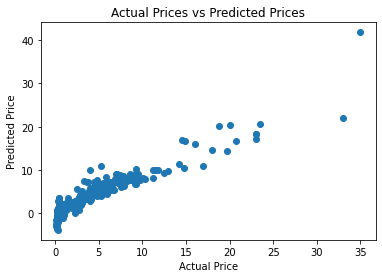

In [47]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [48]:
# prediction on testing set
testing_data_prediction = linearRegressionModel.predict(X_test)

In [49]:
# R squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715026374


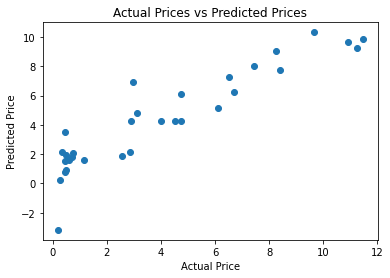

In [50]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2) Lasso Regression

In [51]:
lassoRegressionModel = Lasso()
lassoRegressionModel.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [55]:
# prediction on training set
training_data_prediction = lassoRegressionModel.predict(X_train)

In [57]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


Visualize the actual prices and Predicted prices

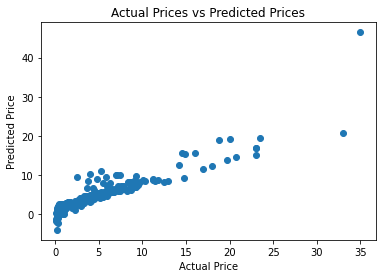

In [56]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [61]:
# prediction on testing set
testing_data_prediction = lassoRegressionModel.predict(X_test)

In [62]:
# R squared Error
error_score = metrics.r2_score(Y_test, testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


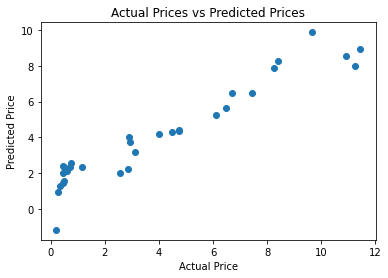

In [63]:
plt.scatter(Y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()